# Seaborn Data Visualization

Seaborn is matplotlib meets pandas. It produces attractive and informative statistical graphics.

- It works best on pandas DataFrames.
- It is convention to load it in using the command: `import seaborn as sns`
- You should also have imported `matplotlib.pyplot as plt` because seaborn uses it.
- The coding context is slightly different to matplotlib.
- However, it can produce some professional looking plots using simpler code than matplotlib.

In [3]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")
%matplotlib inline

In [4]:
# Load the dataset
# Note: You'll need to adjust the file path to where your imdb.csv is located
imdb = pd.read_csv('/home/ryanhabis/Documents/College folder/semester-1/Programming for Data Analytics/dataset/imdb.csv')
imdb.head()

,rank,title,desc,runtime,genre,rating,votes,director,metascore
0,1,13 Hours,"During an attack on a U.S. compound in Libya, ...",144,Action,7.3,155234,Michael Bay,48.0
1,2,Terrifier,"On Halloween night, Tara Heyes finds herself a...",85,Horror,5.6,48568,Damien Leone,NaN
2,3,Suicide Squad,A secret government agency recruits some of th...,123,Action,5.9,710994,David Ayer,40.0
3,4,Hacksaw Ridge,World War II American Army Medic Desmond T. Do...,139,Biography,8.1,573353,Mel Gibson,71.0
4,5,The Nice Guys,"In 1970s Los Angeles, a mismatched pair of pri...",116,Action,7.4,358550,Shane Black,70.0


## 1. Scatterplot with Regression Line (lmplot)

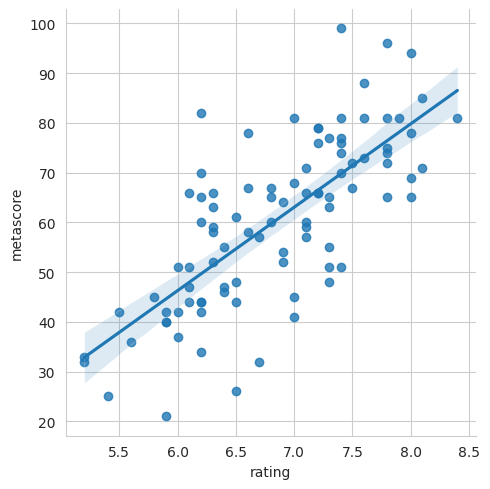

In [5]:
# Basic lmplot
sns.lmplot(x='rating', y='metascore', data=imdb)
plt.show()

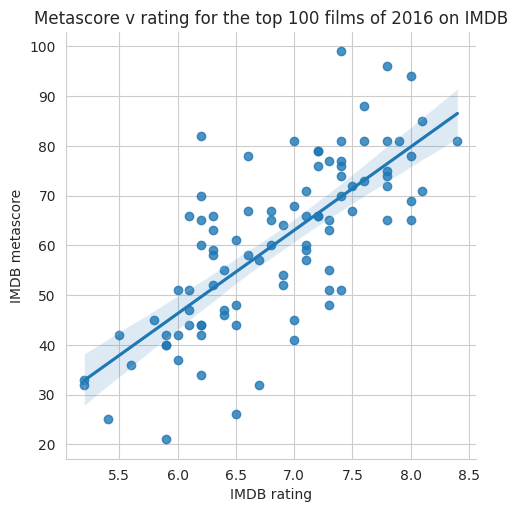

In [6]:
# With custom labels and title
sns.lmplot(x='rating', y='metascore', data=imdb)
plt.xlabel('IMDB rating')
plt.ylabel('IMDB metascore')
plt.title('Metascore v rating for the top 100 films of 2016 on IMDB')
plt.show()

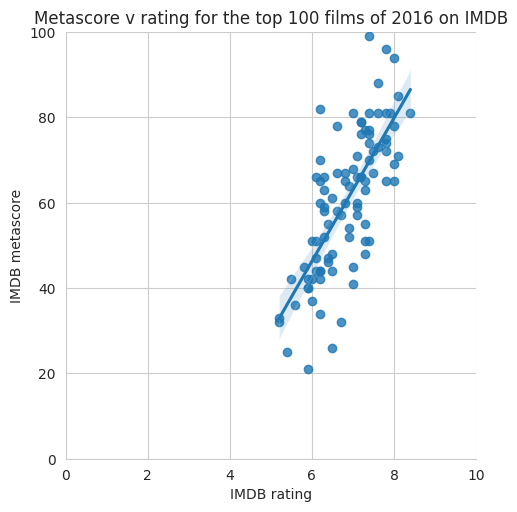

In [7]:
# Setting plot limits
Im_rating = sns.lmplot(x='rating', y='metascore', data=imdb)
plt.xlabel('IMDB rating')
plt.ylabel('IMDB metascore')
plt.title('Metascore v rating for the top 100 films of 2016 on IMDB')
Im_rating.set(ylim=(0, 100), xlim=(0, 10))  # set limits
plt.show()

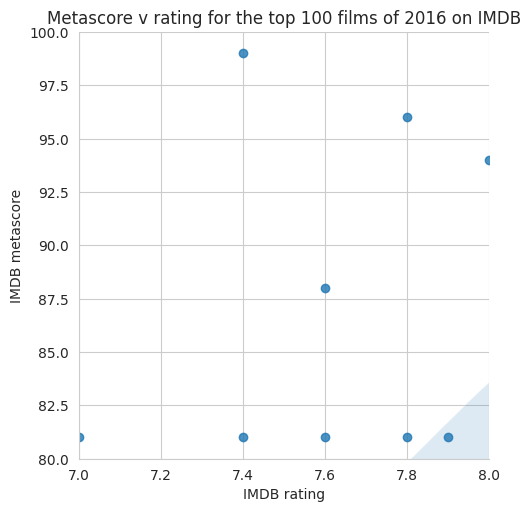

In [8]:
# Zoomed in view
Im_rating = sns.lmplot(x='rating', y='metascore', data=imdb)
plt.xlabel('IMDB rating')
plt.ylabel('IMDB metascore')
plt.title('Metascore v rating for the top 100 films of 2016 on IMDB')
Im_rating.set(ylim=(80, 100), xlim=(7, 8))  # change ylim and xlim to zoom
plt.show()

## 2. Grouping with Hue Parameter

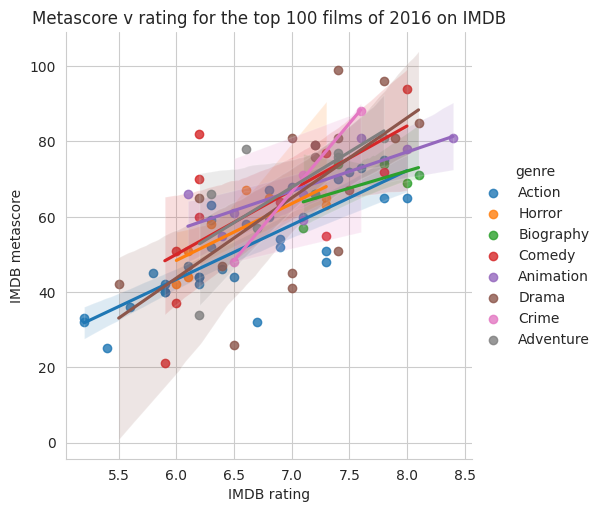

In [9]:
# Color points by genre
sns.lmplot(x='rating', y='metascore', data=imdb, hue='genre')
plt.xlabel('IMDB rating')
plt.ylabel('IMDB metascore')
plt.title('Metascore v rating for the top 100 films of 2016 on IMDB')
plt.show()

## 3. Creating Subplots with col Parameter

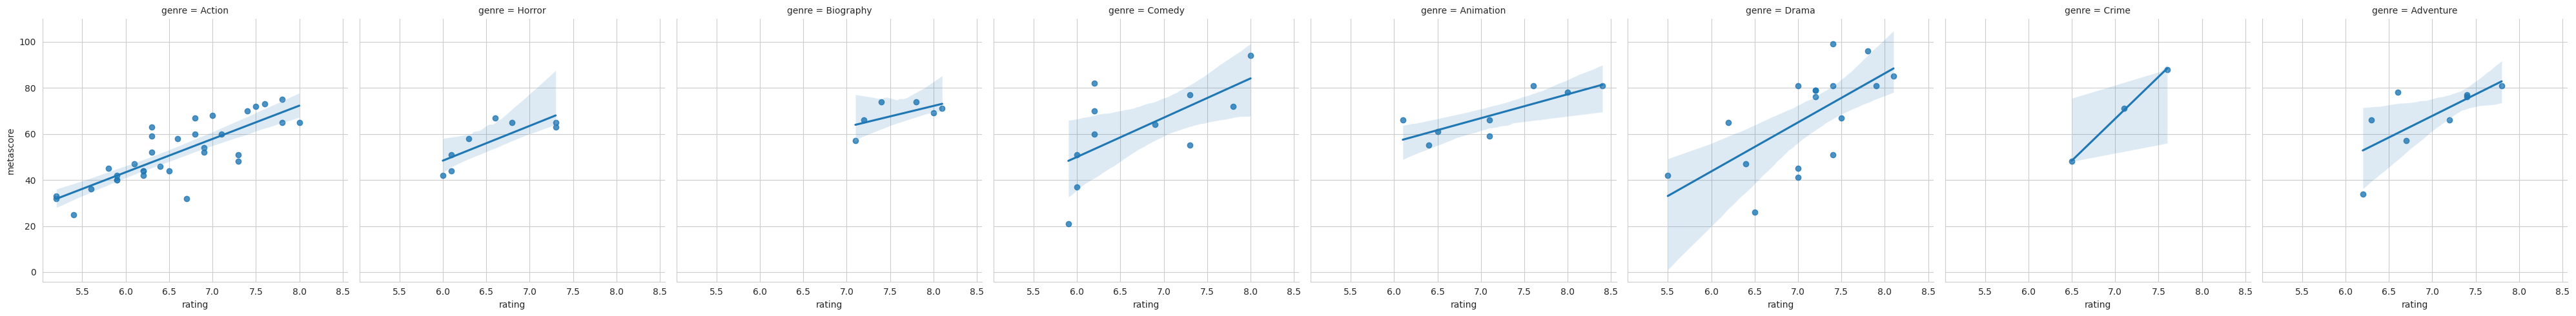

In [10]:
# Subplots by genre (all in one row)
sns.lmplot(x='rating', y='metascore', data=imdb, col='genre')
plt.show()

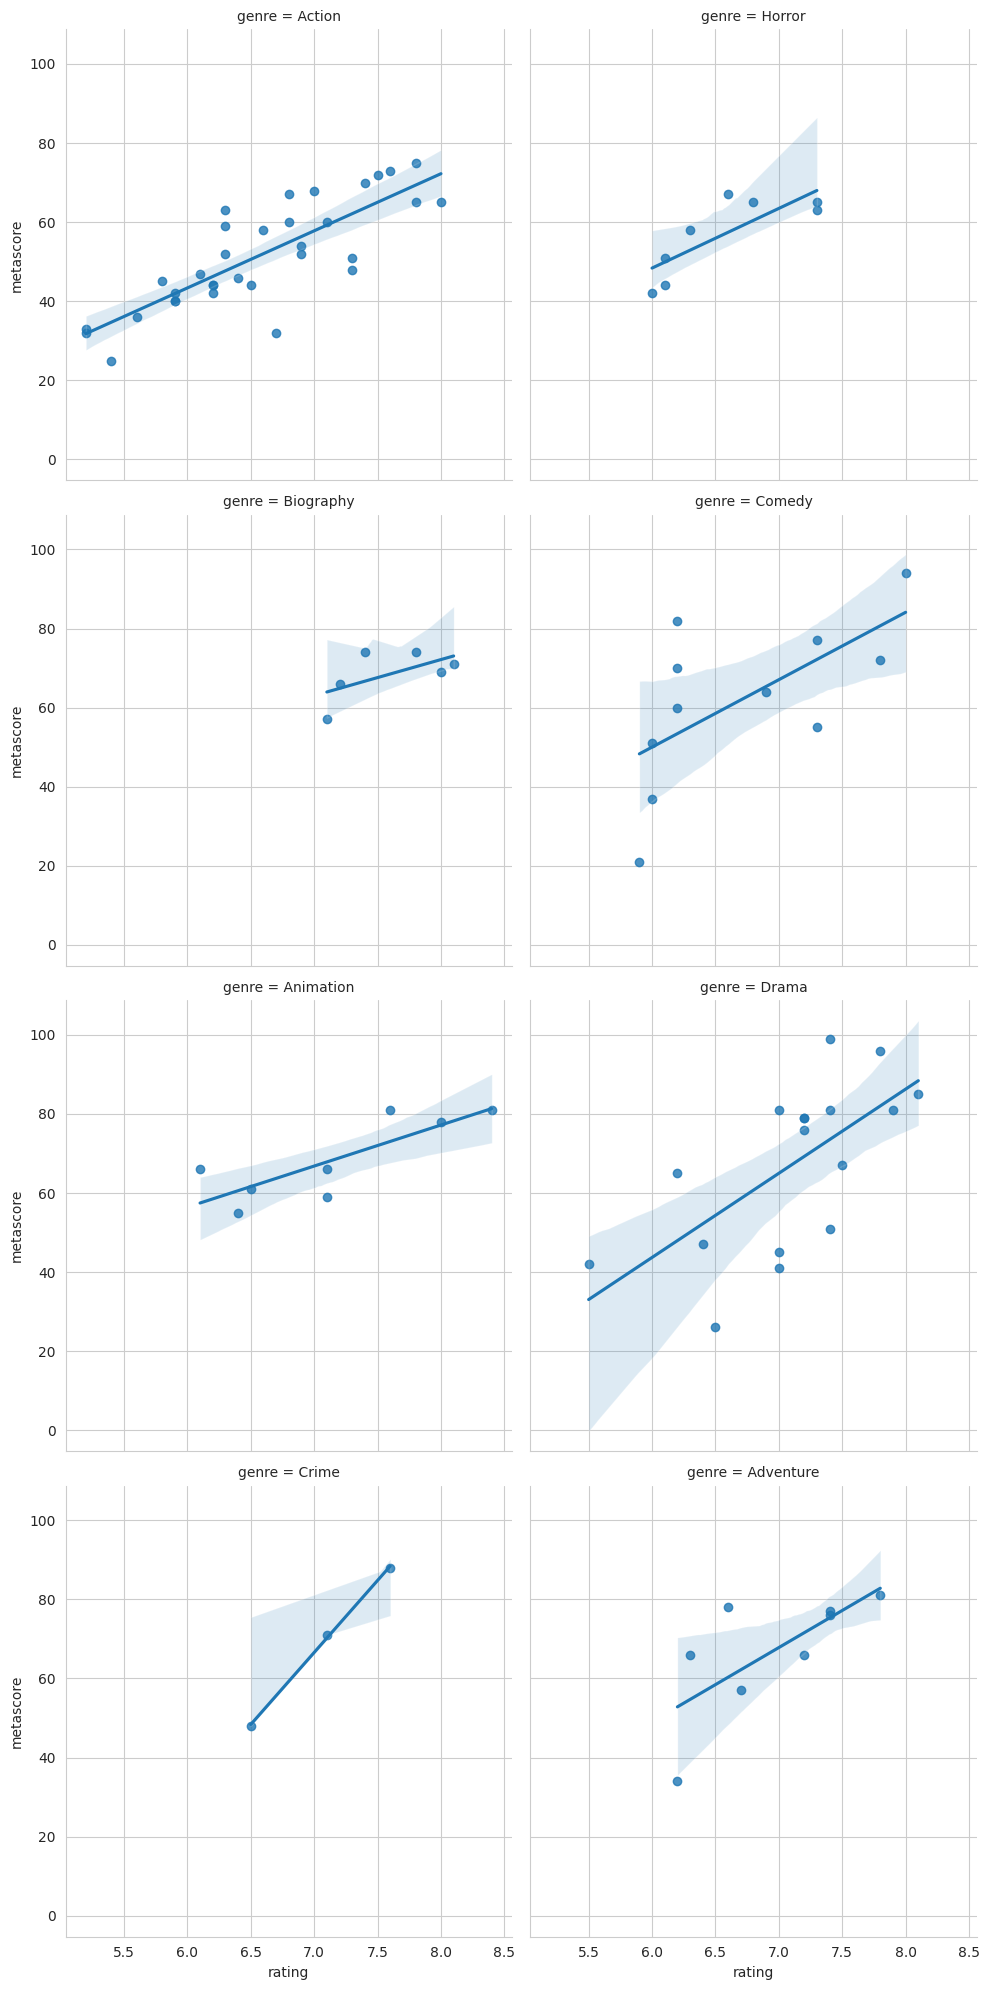

In [11]:
# Subplots wrapped in 2 columns
sns.lmplot(x='rating', y='metascore', data=imdb, col='genre', col_wrap=2)
plt.show()

## 4. Joint Plots

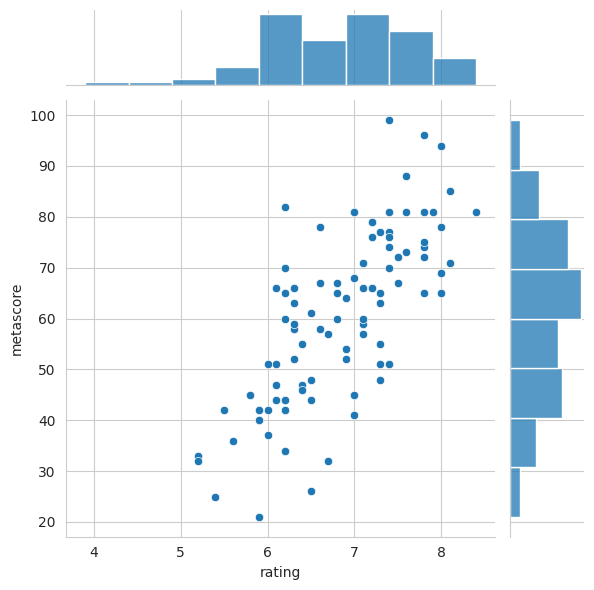

In [12]:
# Joint plot showing scatterplot and histograms
sns.jointplot(x='rating', y='metascore', data=imdb)
plt.show()

## 5. Pair Plots (Matrix Plots)

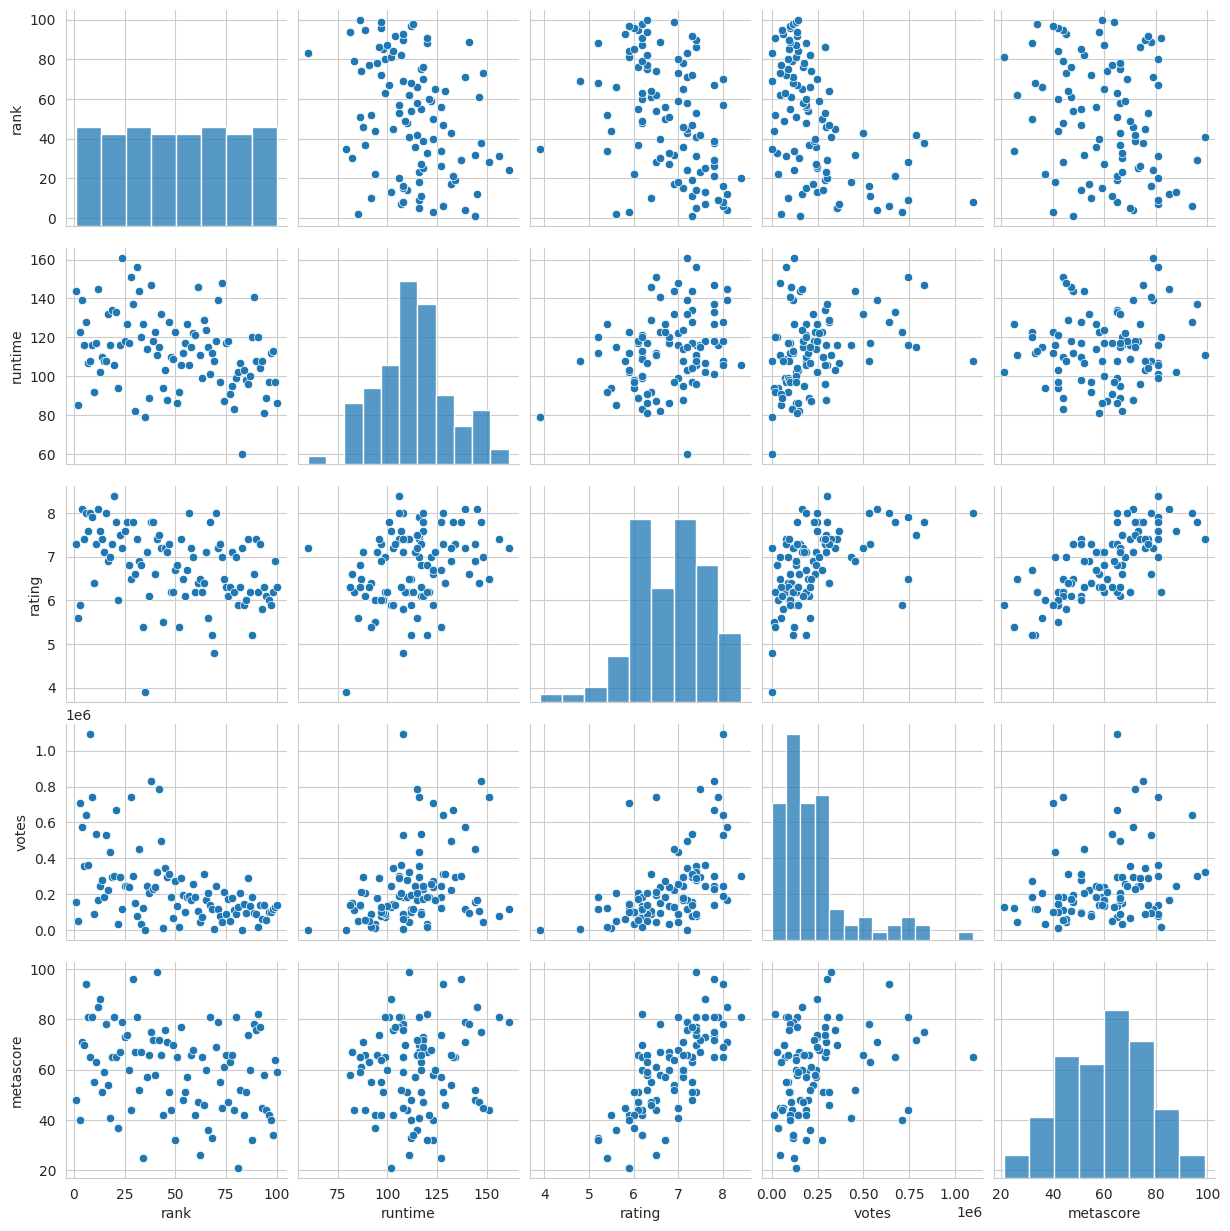

In [13]:
# Pair plot for all numeric variables
sns.pairplot(imdb)
plt.show()

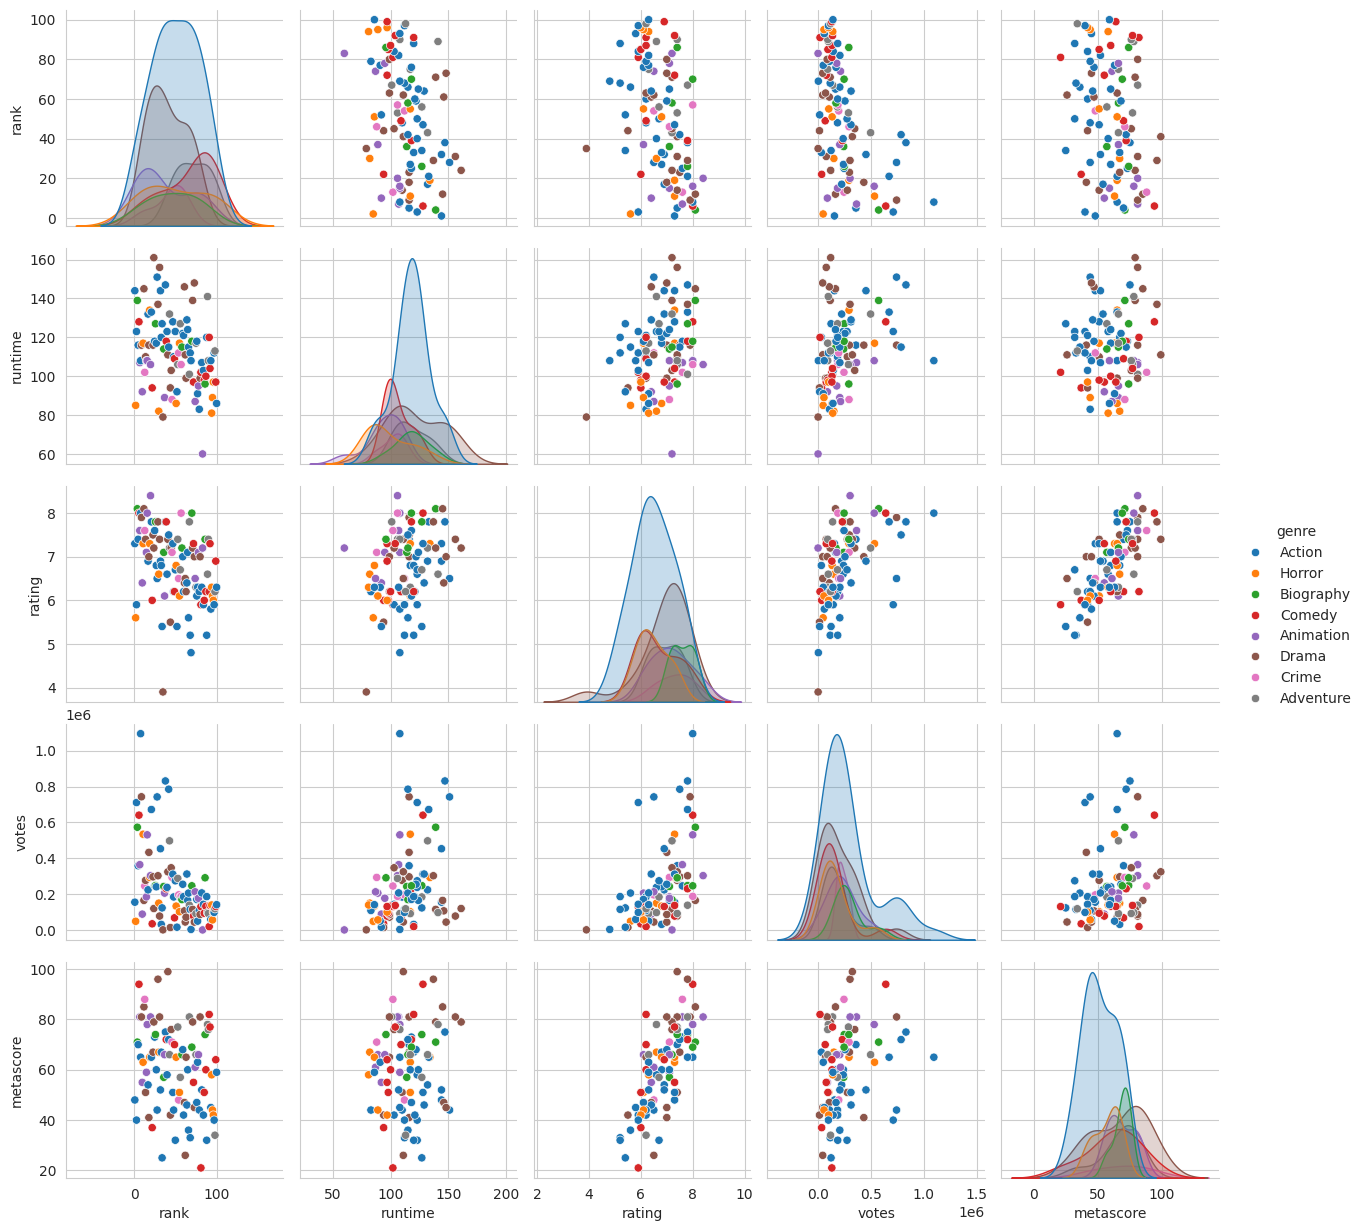

In [14]:
# Pair plot with hue grouping
sns.pairplot(imdb, hue='genre')
plt.show()

## 6. Residual Plots

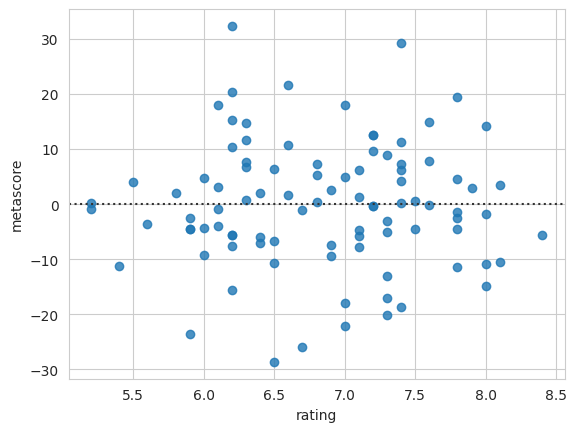

In [15]:
# Residual plot
sns.residplot(x='rating', y='metascore', data=imdb)
plt.show()

## 7. Strip Plots

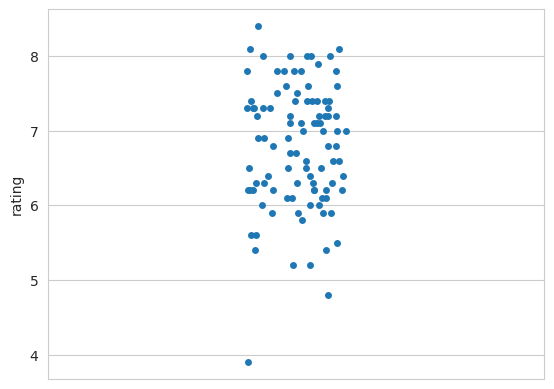

In [16]:
# Basic strip plot
sns.stripplot(y='rating', data=imdb)
plt.show()

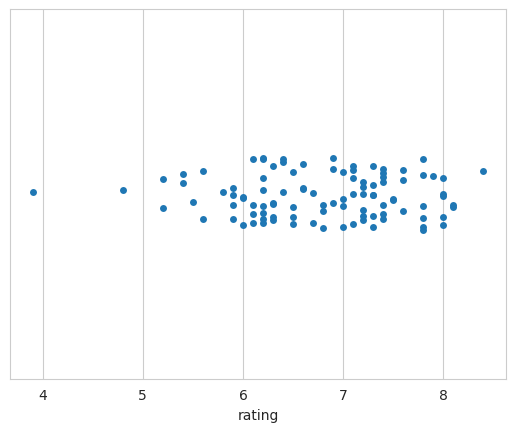

In [17]:
# Horizontal strip plot
sns.stripplot(x='rating', data=imdb)
plt.show()

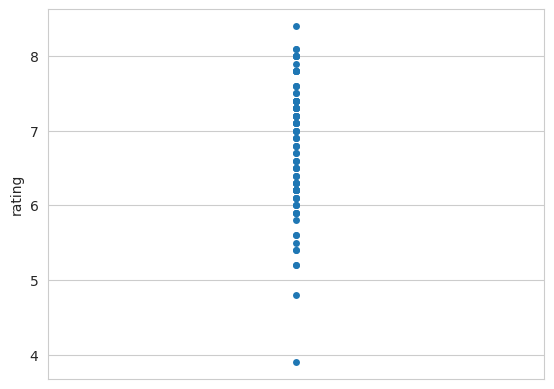

In [18]:
# Without jitter
sns.stripplot(y='rating', data=imdb, jitter=False)
plt.show()

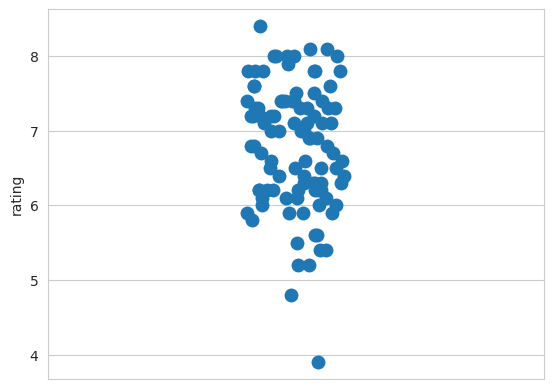

In [19]:
# Larger points
sns.stripplot(y='rating', data=imdb, size=10)
plt.show()

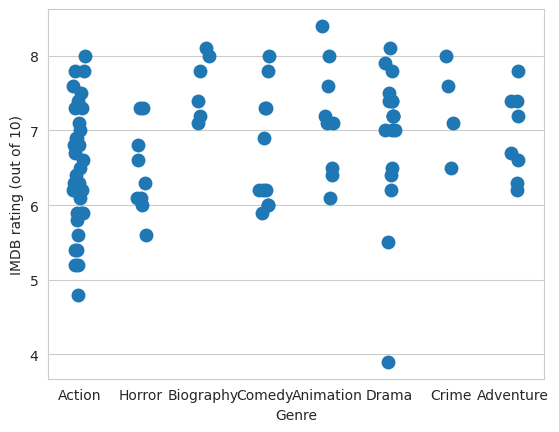

In [20]:
# Grouped by genre
sns.stripplot(x='genre', y='rating', data=imdb, size=10)
plt.xlabel('Genre')
plt.ylabel('IMDB rating (out of 10)')
plt.show()

/tmp/ipykernel_12191/34401198.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  genre_plot.set_xticklabels(genre_plot.get_xticklabels(), rotation=30)


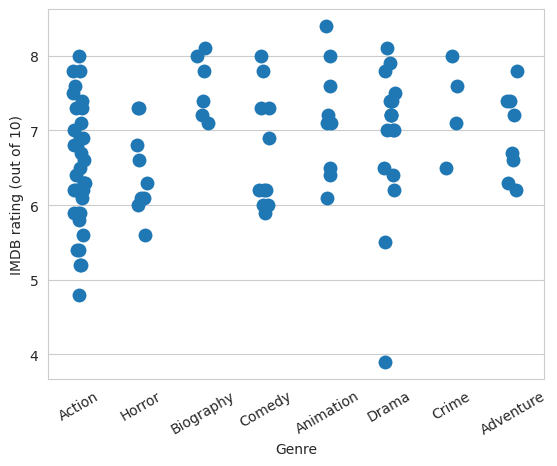

In [21]:
# Rotated x-axis labels
genre_plot = sns.stripplot(x='genre', y='rating', data=imdb, size=10)
plt.xlabel('Genre')
plt.ylabel('IMDB rating (out of 10)')
genre_plot.set_xticklabels(genre_plot.get_xticklabels(), rotation=30)
plt.show()

## 8. Swarm Plots

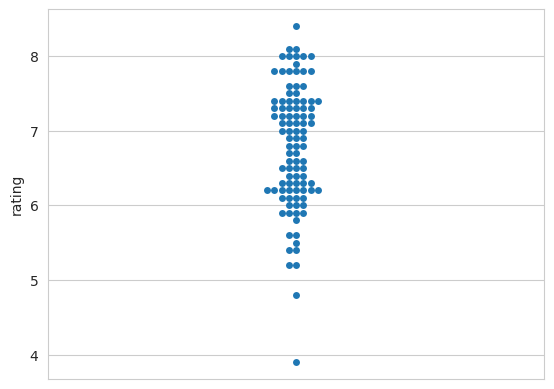

In [22]:
# Swarm plot
sns.swarmplot(y='rating', data=imdb)
plt.show()

## 9. Boxplots and Violin Plots

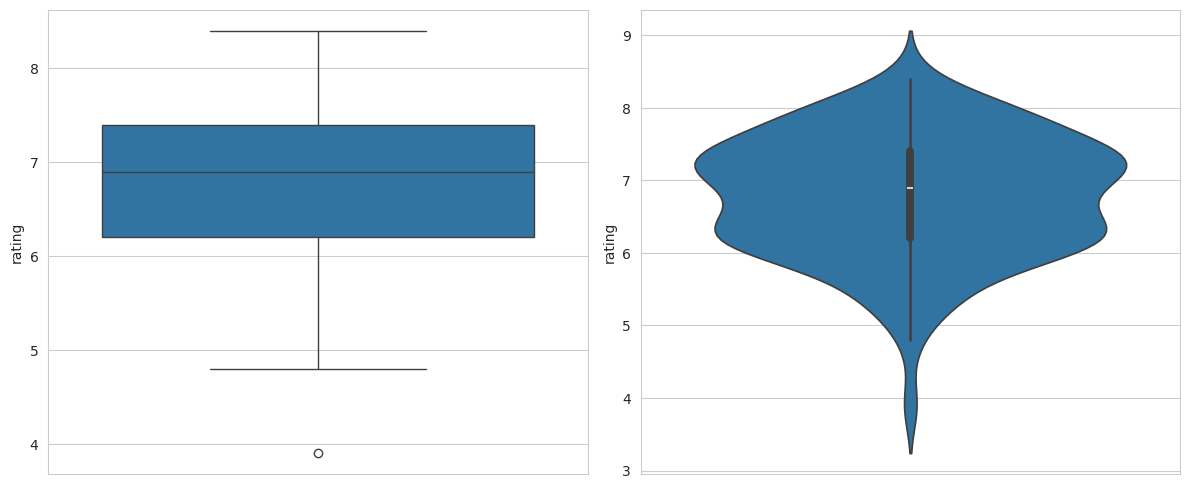

In [23]:
# Side by side comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y='rating', data=imdb, ax=ax[0])
sns.violinplot(y='rating', data=imdb, ax=ax[1])
plt.tight_layout()
plt.show()

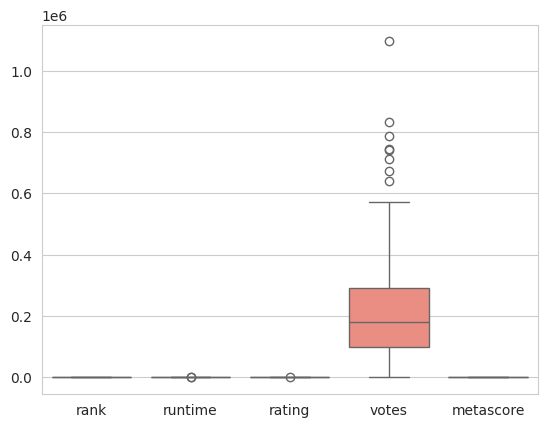

In [24]:
# Boxplot for all numeric variables
sns.boxplot(data=imdb, palette="Set3")
plt.show()

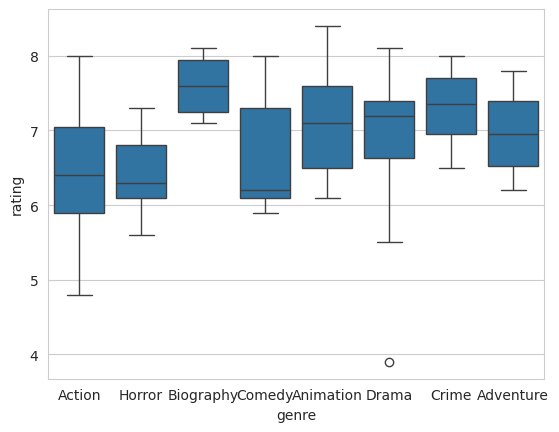

In [25]:
# Boxplot grouped by genre
sns.boxplot(x='genre', y='rating', data=imdb)
plt.show()

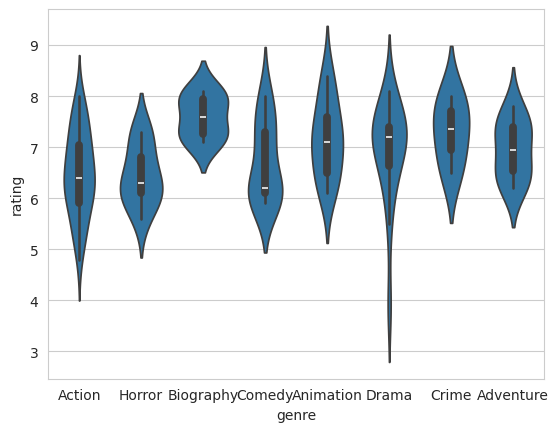

In [26]:
# Violin plot grouped by genre
sns.violinplot(x='genre', y='rating', data=imdb)
plt.show()

## 10. Advanced Boxplot Examples with Football Data

In [27]:
# Load football data
# Note: You'll need to adjust the file path to where your pl_2seasons.csv is located
pl = pd.read_csv("pl_2seasons.csv")
pl.Date = pd.to_datetime(pl.Date, format='%d/%m/%Y')

# Filter for top 6 teams
pl_top6 = pl.loc[pl.HomeTeam.isin(['Arsenal', 'Chelsea', 'Liverpool', 'Man United', 'Man City', 'Tottenham'])]
print(pl_top6)

FileNotFoundError: [Errno 2] No such file or directory: 'pl_2seasons.csv'

In [ ]:
# Boxplot of home fouls by team
sns.boxplot(x='HomeTeam', y='HF', data=pl_top6)
plt.show()

In [ ]:
# Boxplot with hue for match result
foul_plot = sns.boxplot(x='HomeTeam', y='HF', hue='FTR', data=pl_top6)
foul_plot.set_xticklabels(foul_plot.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
# With custom palette
foul_plot = sns.boxplot(x='HomeTeam', y='HF', hue='FTR', data=pl_top6, palette='Set2')
foul_plot.set_xticklabels(foul_plot.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
# With custom order
foul_plot = sns.boxplot(x='HomeTeam', y='HF', hue='FTR', data=pl_top6, palette='Set1',
                       order=['Liverpool', 'Man City', 'Man United', 'Chelsea', 'Tottenham', 'Arsenal'])
foul_plot.set_xticklabels(foul_plot.get_xticklabels(), rotation=45)
plt.show()

## Lab Exercises

1. Download the heart_disease dataset from Moodle and answer the following question using plots:

- At what ages do people seek cardiological exams?
- Do men seek help more than women?
- What % of men and women seek cardio exams?
- Does resting blood pressure increase with age?
- Examine the variables. How do they relate to one another?

## Additional Resources

Good notes on the Seaborn website:
https://seaborn.pydata.org/tutorial/introduction.html